# TASK - 01

# Create a bar chart or histogram to visualize the distribution of
# a categorical or continuous variable, such as the distribution of
# ages or genders in a population.

# Sample Dataset :-
# https://data.worldbank.org/indicator/SP.POP.TOTL

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
female_perc_df = pd.read_excel("C:/Users/PUNEET/Downloads/API_SP.POP.TOTL.FE.ZS_DS2_en_excel_v2_21104.xls")

female_perc_df = female_perc_df[["Country Name", "2024"]].dropna()
female_perc_df.columns = ["Country", "Female_Percent"]
female_perc_df.head()

,Country,Female_Percent
0,Aruba,52.761276
1,Africa Eastern and Southern,50.495876
2,Afghanistan,49.510419
3,Africa Western and Central,49.641570
4,Angola,50.515914


In [3]:
male_perc_df = pd.read_excel("C:/Users/PUNEET/Downloads/API_SP.POP.TOTL.MA.ZS_DS2_en_excel_v2_24121.xls")
male_perc_df = male_perc_df[["Country Name", "2024"]].dropna()
male_perc_df.columns = ["Country", "Male_Percent"]

In [4]:
merge_df = pd.merge(male_perc_df,female_perc_df, on = "Country", how = 'inner')

In [5]:
merge_df["Male_Percent"] = round(merge_df["Male_Percent"], 2)
merge_df["Female_Percent"] = round(merge_df["Female_Percent"], 2)

In [16]:
merge_df.head()

,Country,Male_Percent,Female_Percent
0,Aruba,47.24,52.76
1,Africa Eastern and Southern,49.50,50.50
2,Afghanistan,50.49,49.51
3,Africa Western and Central,50.36,49.64
4,Angola,49.48,50.52


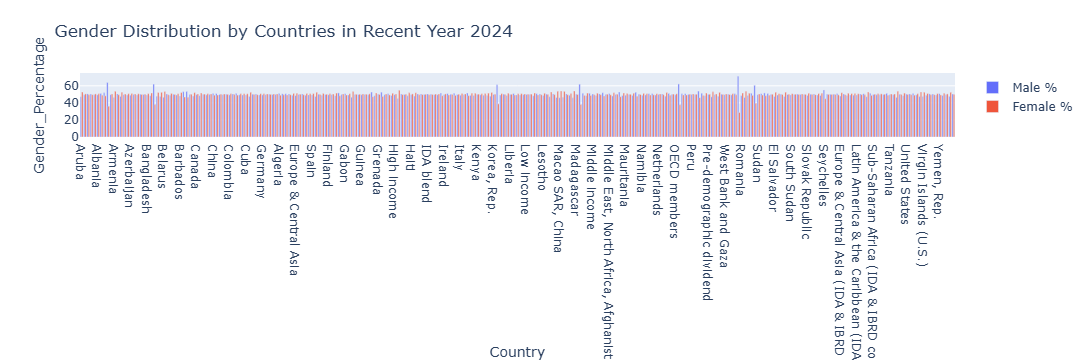

In [6]:
# Create clustered bar chart
fig = go.Figure(data=[
    go.Bar(
        name='Male %',
        x=merge_df['Country'],
        y=merge_df['Male_Percent'],
        textposition='outside'
    ),
     go.Bar(
        name='Female %',
        x=merge_df['Country'],
        y=merge_df['Female_Percent'],
        textposition='outside'
    )
])

# Update layout
fig.update_layout(
    title = "Gender Distribution by Countries in Recent Year 2024",
    barmode = 'group',
    xaxis_title = "Country",
    yaxis_title = "Gender_Percentage",
    template = "plotly",
    uniformtext_minsize = 8,
    uniformtext_mode = 'hide'
)

fig.show()

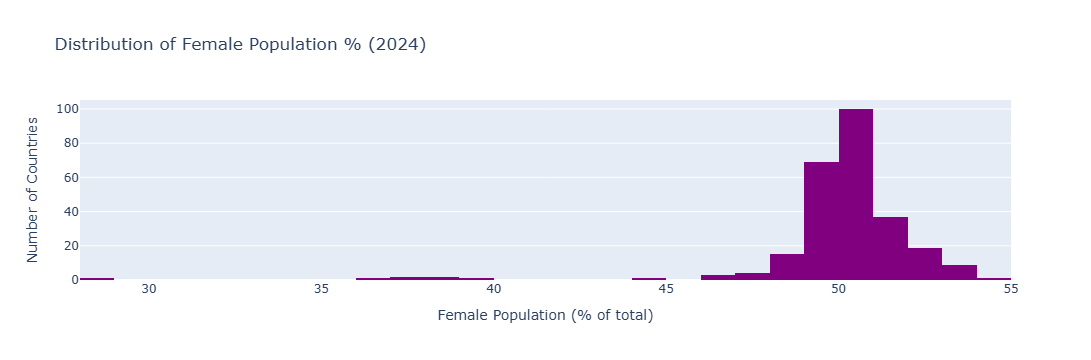

In [7]:
fig = px.histogram(
    merge_df,
    x="Female_Percent",
    title="Distribution of Female Population % (2024)",
    labels={"Female_Percent": "Female Population (% of total)"},
    color_discrete_sequence=["purple"]
)

fig.update_layout(
    xaxis_title="Female Population (% of total)",
    yaxis_title="Number of Countries"
)

fig.show()


#  Bar Chart of Top 10 Countries that have higher female in 2024

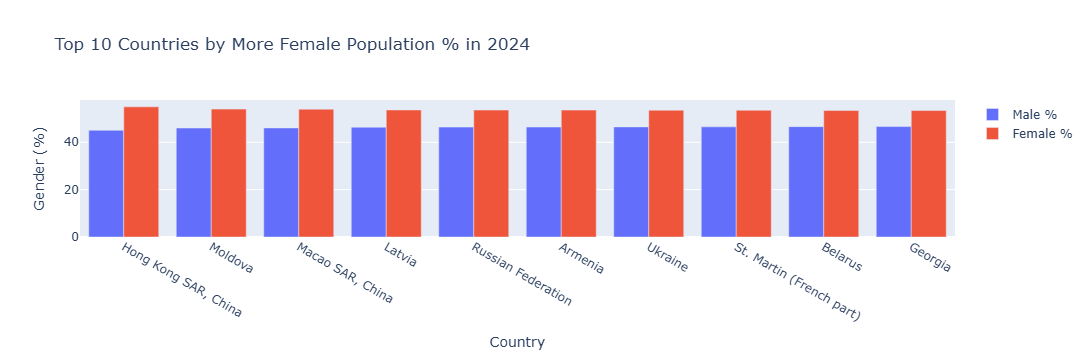

In [19]:
top10_records = merge_df.sort_values(by = 'Female_Percent', ascending = False).head(10)
fig = go.Figure(data = [
    go.Bar(
        name = 'Male %',
        x = top10_records['Country'],
        y = top10_records['Male_Percent']
    ),
    go.Bar(
        name = 'Female %',
        x = top10_records['Country'],
        y = top10_records['Female_Percent'] 
    )
])
fig.update_layout(
    title = "Top 10 Countries by More Female Population % in 2024",
    xaxis_title = "Country",
    yaxis_title = "Gender (%)"
)